In [107]:
from binance.spot import Spot
import pandas as pd
client = Spot()

In [108]:
symbols = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "XRPUSDT", "ADAUSDT", "DOGEUSDT", "MATICUSDT", "SOLUSDT", "DOTUSDT", "LTCUSDT"]

In [109]:
dfs = []

In [110]:
for symbol in symbols:
    # Get last 600 klines of symbol at 1d interval
    rawData = client.klines(symbol=symbol, interval="1d", limit=40)
    # 4 - close price
    # 6 - close time
    # rawData is a list of lists, each list is a kline, take only 4th, 5th and 6th element in every list
    rawData = [x[4:7] for x in rawData]
    # form a dataframe with close price, volume and close time; close time is key
    df = pd.DataFrame(rawData, columns=[symbol, "volume", "close_time"])
    df["close_time"] = pd.to_datetime(df["close_time"], unit="ms")
    df.set_index("close_time", inplace=True)
    df[symbol] = df[symbol].astype(float)
    #drop volume column
    df.drop("volume", axis=1, inplace=True)
    #append to list of dataframes
    dfs.append(df)

In [111]:
#merge all dataframes by index
df = pd.concat(dfs, axis=1)

In [112]:
#calculate returns
df_returns = df.pct_change()
#shift returns by -1 day
df_returns_shifted = df_returns.shift(-1)

Below is Factor calculation

In [113]:
#df_moving_average = df.rolling(window=5).mean() - df.rolling(window=10).mean()
#df_factor = df_moving_average.pct_change()

df_3day = df.shift(3)
df_3day_pct_change = df / df_3day - 1
df_factor = df_3day_pct_change
df_factor.dropna(inplace=True)

In [114]:
#rank each symbol by its percentage change of difference of 3 day moving average and 10 day moving average of price
df_factor_weight = df_factor.rank(axis=1, ascending=True)

In [115]:
df_factor_weight[df_factor_weight<8]=0

In [116]:
df_factor_weight[[df_factor_weight>=8]]=1/3

In [117]:
df_factor_weight

,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,MATICUSDT,SOLUSDT,DOTUSDT,LTCUSDT
close_time,,,,,,,,,,
2023-03-13 23:59:59.999,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
2023-03-14 23:59:59.999,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
2023-03-15 23:59:59.999,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-16 23:59:59.999,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-17 23:59:59.999,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
2023-03-18 23:59:59.999,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333
2023-03-19 23:59:59.999,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333
2023-03-20 23:59:59.999,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
2023-03-21 23:59:59.999,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000


In [118]:
#for every day, use df_moving_average_pct_change_rank to calculate portfolio return
df_portfolio_returns = df_returns_shifted * df_factor_weight
df_portfolio_returns = df_portfolio_returns.sum(axis=1)

<Axes: xlabel='close_time'>

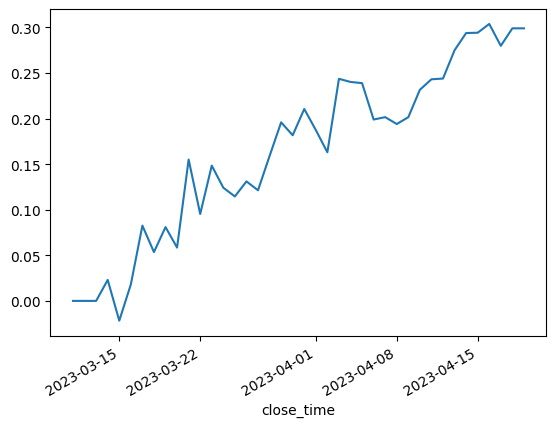

In [119]:
#plot portfolio returns with cumulative sum
df_portfolio_returns.cumsum().plot()